In [6]:
import pandas as pd
import os
hfile=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\ipl dataset\deliveries.csv")
df=pd.read_csv(hfile)
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
#Evaluate the measures of central tendency and measures of dispersion for all the quantitative variables in the dataset.
import numpy as np
from scipy import stats
# Selecting quantitative variables
quantitative_variables = [col for col in df.columns if df[col].dtype != object]

# Iterate through each quantitative variable
for var in quantitative_variables:
  # Getting descriptive statistics
  descriptive_stats = df[var].describe()
  
  # Evaluating measures of central tendency
  #  * Mean: Sensitive to outliers, consider median if skewed distribution
  #  * Median: More robust to outliers, good central tendency value
  #  * Mode: Less informative for most datasets, might not be unique
  print(f"\nVariable: {var}")
  print("  * Mean:", descriptive_stats["mean"])
  print("  * Median:", descriptive_stats["50%"])
# Finding mode using scipy.stats.mode
  try:
      # Try finding the mode, handle potential errors (e.g., no mode)
      modes = stats.mode(df[var])
      print("  * Mode:", modes[0][0])  # Assuming first mode
  except Exception as e:
      print("  * Mode: Not found", e) 


  # Evaluating measures of dispersion
  #  * Range: Simple measure, sensitive to outliers
  #  * Standard Deviation: Measures spread around the mean, unit depends on variable
  #  * Interquartile Range (IQR): More robust to outliers than range, represents middle 50% of data
  print("  * Range:", descriptive_stats["max"] - descriptive_stats["min"])
  print("  * Standard Deviation:", descriptive_stats["std"])
  print("  * IQR:", descriptive_stats["75%"] - descriptive_stats["25%"])



Variable: match_id
  * Mean: 1802.2529568121154
  * Median: 379.0
  * Mode: 126
  * Range: 11414.0
  * Standard Deviation: 3472.3228053089947
  * IQR: 377.0

Variable: inning
  * Mean: 1.4829515630060643
  * Median: 1.0
  * Mode: 1
  * Range: 4.0
  * Standard Deviation: 0.5020741397421843
  * IQR: 1.0

Variable: over
  * Mean: 10.162487854454483
  * Median: 10.0
  * Mode: 1
  * Range: 19.0
  * Standard Deviation: 5.67768431274356
  * IQR: 10.0

Variable: ball
  * Mean: 3.6155865042048716
  * Median: 4.0
  * Mode: 1
  * Range: 8.0
  * Standard Deviation: 1.8069659750222513
  * IQR: 3.0

Variable: is_super_over
  * Mean: 0.00045231686751024693
  * Median: 0.0
  * Mode: 0
  * Range: 1.0
  * Standard Deviation: 0.021262991361583765
  * IQR: 0.0

Variable: wide_runs
  * Mean: 0.036721428651202266
  * Median: 0.0
  * Mode: 0
  * Range: 5.0
  * Standard Deviation: 0.25116113123327916
  * IQR: 0.0

Variable: bye_runs
  * Mean: 0.004936396430605658
  * Median: 0.0
  * Mode: 0
  * Range: 4.0
  

C:\Users\pabba\AppData\Local\Temp\ipykernel_22876\354644763.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = stats.mode(df[var])
C:\Users\pabba\AppData\Local\Temp\ipykernel_22876\354644763.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = st

   ## BINOMIAL DISTRIBUTION

1.Calculate the binomial distribution of getting two wickets in the next over if Harbhajan Singh is bowling.

2.Calculate the binomial distribution of getting 1 six in the next over if Virat Kohli or V Kohli is batting.

3.Calculate the binomial distribution of the batting team scoring ten runs or more in the last over for 2 of the next ten matches.

4.Calculate the probability for the next ten games going over 18 overs.

In [10]:
df.shape

(179078, 21)

In [12]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## 1.Calculate the binomial distribution of getting two wickets in the next over if Harbhajan Singh is bowling.

In [11]:
df[df["bowler"]=="Harbhajan Singh"]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1478,7,1,Kolkata Knight Riders,Mumbai Indians,9,1,MK Pandey,YK Pathan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1479,7,1,Kolkata Knight Riders,Mumbai Indians,9,2,MK Pandey,YK Pathan,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1480,7,1,Kolkata Knight Riders,Mumbai Indians,9,3,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1481,7,1,Kolkata Knight Riders,Mumbai Indians,9,4,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
1482,7,1,Kolkata Knight Riders,Mumbai Indians,9,5,YK Pathan,MK Pandey,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178895,11415,1,Mumbai Indians,Chennai Super Kings,11,2,Ishan Kishan,AS Yadav,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178896,11415,1,Mumbai Indians,Chennai Super Kings,11,3,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
178897,11415,1,Mumbai Indians,Chennai Super Kings,11,4,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178898,11415,1,Mumbai Indians,Chennai Super Kings,11,5,AS Yadav,Ishan Kishan,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [14]:
df[df["bowler"]=="Harbhajan Singh"]["player_dismissed"]

1478      NaN
1479      NaN
1480      NaN
1481      NaN
1482      NaN
         ... 
178895    NaN
178896    NaN
178897    NaN
178898    NaN
178899    NaN
Name: player_dismissed, Length: 3451, dtype: object

In [15]:
df[df["bowler"]=="Harbhajan Singh"]["player_dismissed"].isna()

1478      True
1479      True
1480      True
1481      True
1482      True
          ... 
178895    True
178896    True
178897    True
178898    True
178899    True
Name: player_dismissed, Length: 3451, dtype: bool

In [16]:
df[df["bowler"]=="Harbhajan Singh"]["player_dismissed"].isna().sum()

3290

In [18]:
df[df["bowler"]=="Harbhajan Singh"].shape

(3451, 21)

Out of 3451 balls he bowled, 3290 balls were without wickets

In [20]:
# total wickets
total_wickets= 3451-3290
total_wickets

161

Out of 3451 balls he bowled, he took 161 wickets

In [21]:
# getting the wicket rate from total balls he bowled
success_rate= 161/3451
success_rate

0.04665314401622718

# Now that we have wicket rate, lets calculate the binomial distribution of getting two wickets in the next over if Harbhajan Singh is bowling

In [22]:
from scipy import stats

In [23]:
from scipy.stats import binom

In [24]:
binom.pmf(k=2,n=6,p=0.0466531440162271)

0.026968503458726475

Proability of 2% that harbhajan singh can get two wickets in next 6 balls

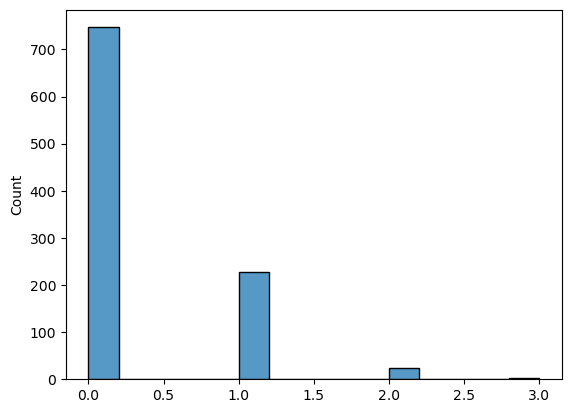

In [25]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(random.binomial(n=6,p=0.04665314401622718,size=1000),kde=False)
plt.show()

## 2.Calculate the binomial distribution of getting 1 six in the next over if Virat Kohli or V Kohli is batting.

In [34]:
df_kohli=df[df["batsman"]=="V Kohli"]
df_kohli

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177522,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,7,V Kohli,AB de Villiers,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177523,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177524,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177525,11345,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,V Kohli,AB de Villiers,K Ahmed,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [35]:
df_kohli.shape

(4211, 21)

In [37]:
df_kohli_six=df_kohli[df_kohli["batsman_runs"]==6]
df_kohli_six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2603,12,1,Royal Challengers Bangalore,Mumbai Indians,3,1,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2673,12,1,Royal Challengers Bangalore,Mumbai Indians,14,5,V Kohli,AB de Villiers,JJ Bumrah,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
3945,17,2,Royal Challengers Bangalore,Rising Pune Supergiant,1,3,V Kohli,Mandeep Singh,JD Unadkat,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
4651,20,1,Royal Challengers Bangalore,Gujarat Lions,15,5,V Kohli,TM Head,S Kaushik,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
6931,30,1,Royal Challengers Bangalore,Gujarat Lions,2,5,V Kohli,CH Gayle,Basil Thampi,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175812,11337,2,Royal Challengers Bangalore,Delhi Capitals,5,3,V Kohli,PA Patel,I Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176412,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,1,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176413,11340,1,Royal Challengers Bangalore,Rajasthan Royals,1,2,V Kohli,AB de Villiers,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
176418,11340,1,Royal Challengers Bangalore,Rajasthan Royals,2,1,V Kohli,AB de Villiers,S Gopal,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [38]:
df_kohli_six.shape

(191, 21)

In [39]:
# success rate of virat hitting six among all the balls he faced
six_rate= 191/4211
six_rate

0.04535739729280456

In [40]:
binom.pmf(k=1,n=6,p=0.04535739729280456)

0.21577614733156159

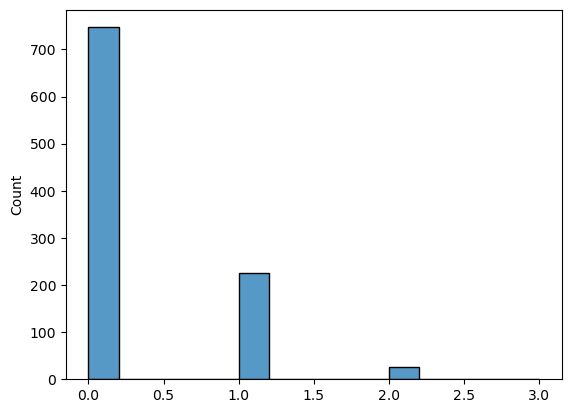

In [41]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(random.binomial(n=6,p=0.04535739729280456,size=1000),kde=False)
plt.show()

## 3.Calculate the binomial distribution of the batting team scoring ten runs or more in the last over for 2 of the next ten matches.

In [42]:
df_lastover=df[df["over"]==20]

In [43]:
df_lastover

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
119,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,1,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [45]:
df_lastover.shape

(6738, 21)

In [52]:
df["match_id"].nunique()

756

In [51]:
df_lastover["match_id"].nunique()

716

<Axes: ylabel='Frequency'>

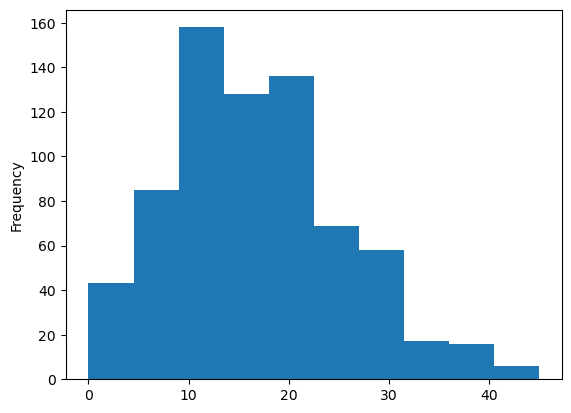

In [53]:
#plotting total score for each match in the last over
df_lastover.groupby('match_id')['total_runs'].sum().plot(kind='hist')

In [54]:
df_lastover_runs=df_lastover.groupby('match_id')['total_runs'].sum()
df_lastover_runs

match_id
1        23
2        45
3        14
4        16
5        10
         ..
11347     3
11412    10
11413    21
11414    16
11415    16
Name: total_runs, Length: 716, dtype: int64

In [55]:
df_lastover_runs[df_lastover_runs>=10]

match_id
1        23
2        45
3        14
4        16
5        10
         ..
11345    37
11412    10
11413    21
11414    16
11415    16
Name: total_runs, Length: 563, dtype: int64

In [57]:
df_lastover_runs[df_lastover_runs>=10].shape

(563,)

In [58]:
#probability of getting 10 or more runs in last over
proba_of_10_or_more=563/716
proba_of_10_or_more

0.7863128491620112

binomial distribution of the batting team scoring ten runs or more in the last over for 2 of the next ten matches.

In [59]:
binom.pmf(k=2,n=10,p=0.7863128491620112)

0.00012095686634387644

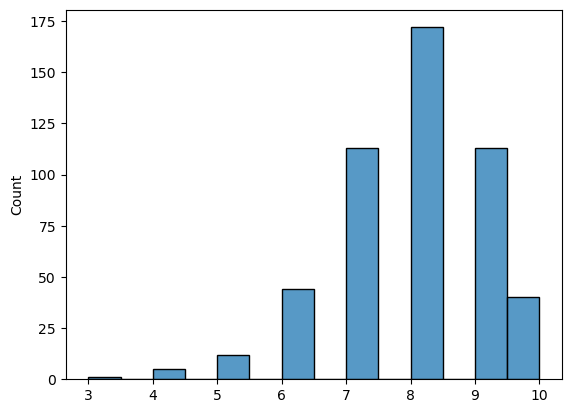

In [60]:
sns.histplot(random.binomial(n=10,p=0.7863128491620112,size=500),kde=False)
plt.show()